# ПЕРВАЯ ЧАСТЬ

In [61]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

## Инициализация датасета и исследование

In [62]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['TEMP'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TEMP
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Предобработка датасета и разбиение на тренировочные и тестовые наборы

In [63]:
diabetes.data = preprocessing.scale(diabetes.data)
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3,
                                                    random_state=42)

## Тренировка модели с использованием перекрестной проверки

In [64]:
from sklearn.model_selection import cross_val_score
# logreg не очень подходящее имя, но я уже его везде происпользовал, поэтому оставил
logreg = LinearRegression()
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)

scores = cross_val_score(logreg, diabetes.data, diabetes.target, cv=5)

print("Cross-validation scrores: {}".format(scores))
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Cross-validation scrores: [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
Средняя правильность перекрестной проверки: 0.48


In [65]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, diabetes.data, diabetes.target, cv=5,
                         return_train_score = True)
display(res)

{'fit_time': array([0.00201321, 0.00100183, 0.00100136, 0.00099969, 0.00099897]),
 'score_time': array([0.00199246, 0.00099707, 0.00100064, 0.00101423, 0.00100112]),
 'test_score': array([0.42955615, 0.52259939, 0.48268054, 0.42649776, 0.55024834]),
 'train_score': array([0.52428257, 0.51032125, 0.52379451, 0.53137766, 0.50775068])}

## среднее время работы 

In [66]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.002013,0.001992,0.429556,0.524283
1,0.001002,0.000997,0.522599,0.510321
2,0.001001,0.001001,0.482681,0.523795
3,0.001000,0.001014,0.426498,0.531378
4,0.000999,0.001001,0.550248,0.507751


Mean times and scores:
 fit_time       0.001203
score_time     0.001201
test_score     0.482316
train_score    0.519505
dtype: float64


In [67]:
## используем k-блочную проверку

In [68]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки: \n{}".format(cross_val_score(logreg, diabetes.data, diabetes.target, cv = kfold)))

Значения правильности перекрестной проверки: 
[0.40409883 0.52126483 0.54380121]


In [70]:
## использование shuffle split валидации

In [71]:
from sklearn.model_selection import ShuffleSplit
shufle_split = ShuffleSplit(test_size= .5, train_size= .5, n_splits=10)
scores = cross_val_score(logreg, diabetes.data, diabetes.target, cv = shufle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.50070664 0.52649968 0.48236145 0.50511805 0.49927656 0.46019953
 0.53672448 0.4241638  0.45502971 0.44688531]


## Простой решетчатый поиск

In [72]:
from sklearn.svm import SVC
from sklearn.svm import SVR
print("Размер обучающего набора: {}. Размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combinatino of parameters, train and SVC
        svm = SVR(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        print(score)
        # if we got a better score, store the score and parameter
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшее значение параметров: {}".format(best_parameters))

Размер обучающего набора: 309. Размер тестового набора: 133
-0.0064816919034291764
-0.006337492546915957
-0.004890314222969261
0.010988165705648756
0.12651090305824964
0.4466738051524025
-0.0063707688185565825
-0.005229688743283667
0.007663887570103944
0.10733798926461635
0.4424772022336989
0.47658178393615813
-0.006285481223767597
-0.004378893680444751
0.01601426443457077
0.16117357347723693
0.498547080004888
0.47699999381007263
-0.006492099464803003
-0.0064450830333100395
-0.005971669996975848
-0.0014211523037037654
0.03968556810741297
0.1999250896973972
-0.006496618361537587
-0.006492220062969123
-0.006442854890317928
-0.006278923890281396
-0.006500692104129735
-0.00011055888414657211
-0.0064966195787370395
-0.006492232236146034
-0.006442976747329299
-0.006280146375772233
-0.006513399147304977
-0.00014183471548068205
Наилучшее значение правильности: 0.50
Наилучшее значение параметров: {'C': 10, 'gamma': 0.1}


In [73]:
# разбиваем данные на обучающий+проверочный набор и тестовый набор 
X_trainval, X_test, y_trainval, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0) 
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы 
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1) 
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 
 
best_score = 0 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:     
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        # для каждой комбинации параметров обучаем SVC         
        svm = SVR(gamma=gamma, C=C)         
        svm.fit(X_train, y_train) 
        # оцениваем качество SVC на тестовом наборе         
        score = svm.score(X_valid, y_valid) 
        # если получаем наилучшее значение правильности, сохраняем значение и параметры 
        if score > best_score:             
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе 
svm = SVR(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score)) 
print("Наилучшие значения параметров: ", best_parameters) 
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))  


Размер обучающего набора: 248 размер проверочного набора: 83 размер тестового набора: 111
Лучшее значение правильности на проверочном наборе: 0.62
Наилучшие значения параметров:  {'C': 100, 'gamma': 0.1}
Правильность на тестовом наборе с наилучшими параметрами: 0.21


In [74]:
## Решетчатый поиск с перекрестной проверкой

In [75]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:     
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        # для каждой комбинации параметров обучаем SVC
        svm = SVR(gamma=gamma, C=C) 
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # вычисляем среднюю правильность перекрестной проверки
        score = np.mean(scores)
        # если получаем лучшее значение правильности, сохраняем значение и параметры
        if score > best_score:             
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
# заново строи модель на наборе, полученном в результате объединения обучающих и проверочных данных
svm = SVR(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVR(C=100, gamma=0.1)

## класс GridSearchCV

In [81]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf']}
print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}


In [82]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

In [94]:
grid_search.fit(X_train, y_train)
print("Правильность на тестовом наборе:{:.2f}".format(grid_search.score(X_test, y_test)))
print("Наилучшее значение параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {}".format(grid_search.best_score_))
print("Наилучшая модель: {}".format(grid_search.best_estimator_))

Правильность на тестовом наборе:0.35
Наилучшее значение параметров: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Наилучшее значение кросс-валидац. правильности: 0.4948773220738554
Наилучшая модель: SVR(C=100, gamma=0.01)


## Экономичный решетчатый поиск

In [85]:
param_grid2 = [{'kernel': ['rbf'],
                'C':[0.001, 0.01, 0.1, 1, 10, 100], 
                'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
               {'kernel': ['linear'], 
                'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid2))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [92]:
grid_search2 = GridSearchCV(SVR(), param_grid2, cv=5)
grid_search2.fit(X_train, y_train)
print("Наилучшие значения параметров: {}".format(grid_search2.best_params_))
print("Наилучшие значения кросс-валид. правильности: {}".format(grid_search2.best_score_))

Наилучшие значения параметров: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Наилучшие значения кросс-валид. правильности: 0.4948773220738554


In [87]:
results2 = pd.DataFrame(grid_search2.cv_results_)
results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006320,0.007742,0.000000,0.000000,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",-0.176312,-0.035205,-0.007031,-0.012370,-0.008210,-0.047826,0.065052,31
1,0.006253,0.007659,0.000000,0.000000,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",-0.176285,-0.035144,-0.006949,-0.012276,-0.008134,-0.047757,0.065073,29
2,0.000000,0.000000,0.003133,0.006266,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",-0.176250,-0.035099,-0.006910,-0.012241,-0.008101,-0.047720,0.065074,27
3,0.003120,0.006241,0.000000,0.000000,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",-0.176315,-0.035211,-0.007042,-0.012384,-0.008221,-0.047835,0.065048,32
4,0.004054,0.008109,0.002502,0.005004,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",-0.176316,-0.035214,-0.007044,-0.012386,-0.008222,-0.047836,0.065048,34
5,0.003134,0.006268,0.000000,0.000000,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",-0.176316,-0.035214,-0.007044,-0.012386,-0.008222,-0.047836,0.065048,33
6,0.000000,0.000000,0.006242,0.007645,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",-0.176279,-0.035126,-0.006921,-0.012243,-0.008106,-0.047735,0.065082,28
7,0.004461,0.006158,0.004140,0.003726,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",-0.176004,-0.034517,-0.006098,-0.011302,-0.007340,-0.047052,0.065296,25
8,0.003134,0.006268,0.000000,0.000000,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",-0.175657,-0.034068,-0.005710,-0.010952,-0.007011,-0.046679,0.065304,23
9,0.003125,0.006250,0.000000,0.000000,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",-0.176305,-0.035188,-0.007026,-0.012382,-0.008218,-0.047824,0.065048,30


## Вложенная перекрестная проверка

In [88]:
scores = cross_val_score(GridSearchCV(SVR(), param_grid2, cv=5), diabetes.data, diabetes.target, cv=5)
print("Значения правильности перекрестной проверки: {}".format(scores))
print("Среднее значение правильности перекрестной проверки: {}".format(scores.mean()))

Значения правильности перекрестной проверки: [0.44136016 0.51605321 0.49626546 0.44422395 0.54979163]
Среднее значение правильности перекрестной проверки: 0.4895388813821663


In [96]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    global best_params
    outer_scores = []
    # для каждого разбиения данных во внешней перекрестной проверке 
    # (метод split возвращает индексы)   
    for training_samples, test_samples in outer_cv.split(X, y):
        # находим наилучшие параметры с помощью внутренней перекрестной проверки  
        best_parms = {}
        best_score = -np.inf
        # итерируем по параметрам   
        for parameters in parameter_grid:
             # собираем значения правильности по всем внутренним разбиениям 
            cv_scores = []
             # итерируем по разбиениям внутренней перекрестной проверки 
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
               # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры 
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе 
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)


In [97]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(diabetes.data, diabetes.target, StratifiedKFold(5), StratifiedKFold(5), SVR, ParameterGrid(param_grid2))
print("Значения правильности перекрестной проверки: {}".format(scores))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-pa

Значения правильности перекрестной проверки: [0.40569525 0.51075746 0.51861947 0.45594695 0.55634517]


## Метрики качества моделей и их вычисление

In [107]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

# здесь берем лучшую модель
best_model = grid_search2.best_estimator_
# предсказываем на тестовом наборе
y_test_pred = best_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Mean Percentage Error (MPE)
mpe = np.mean((y_test - y_test_pred) / y_test) * 100

# Print the results
print(f"R^2 (R²): {r2:.4f}")
print(f"Корень средней квадратной ошибки (RMSE): {rmse:.4f}")
print(f"Средний процент ошибки (MPE): {mpe:.4f}%")

R^2 (R²): 0.3522
Корень средней квадратной ошибки (RMSE): 56.7074
Средний процент ошибки (MPE): -19.6142%


## визуализация качества проверок

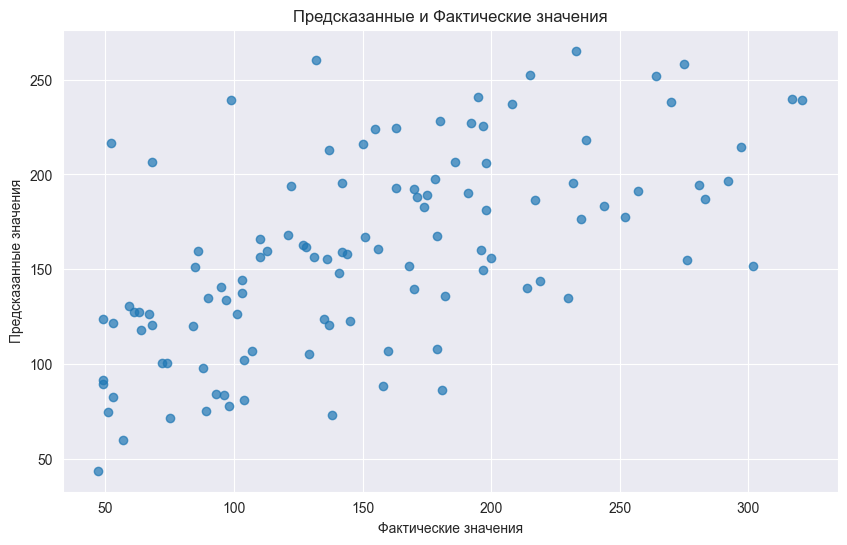

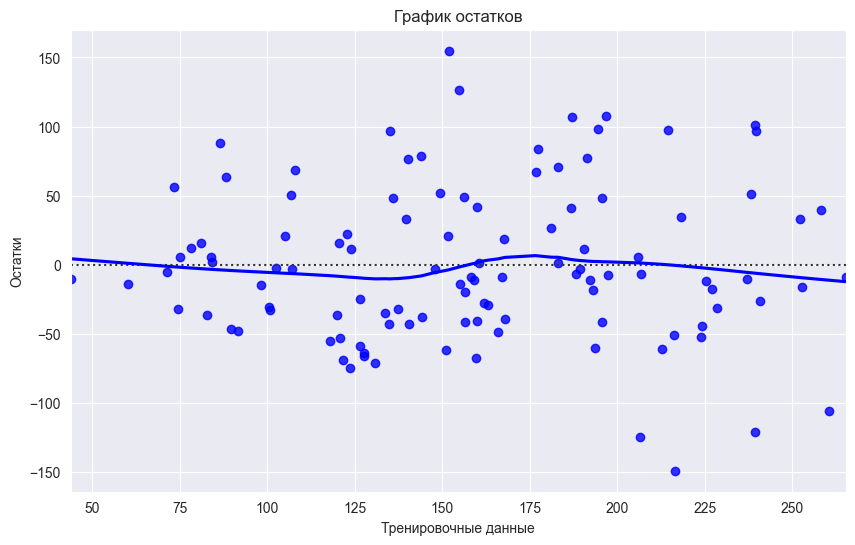

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot of predicted vs actual values
# log_pred_subset = log_pred[:len(y_test)]
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.title('Предсказанные и Фактические значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.show()

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, color="b")
plt.title('График остатков')
plt.xlabel('Тренировочные данные')
plt.ylabel('Остатки')
plt.show()

# Вторая часть

In [30]:
import random as rd
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


### Создание датасета с рандомными данными

In [53]:
# количество строк
num_rows = 1000

salary = np.random.randint(25000, 100000, size=num_rows)
city = np.random.choice(['Bishkek', 'Osh', 'Karakol'], size=num_rows)
age = np.random.randint(22, 65, size=num_rows)
vacation_prefer = np.random.choice(['Beach','Shopping'], size=num_rows)
transport_prefer = np.random.choice(['Car','Plane'], size=num_rows)

target = np.random.choice(['Dubai', 'Madrid'], size=num_rows)

In [0]:

# так как при случайном генерировании данных features между собой слабо связаны
# ниже была попытка добавить связанность данных между зарплатой и целевыми городами
# точность была повышена до 60
# однако как мы уже поняли, данные слишком очевидными стали, при этом учитываение остальных features стала значительно меньше
# поэтому было принято решение сделать данные случайными.

# target = []
# for i in salary:
#     if i<35000:
#         target.append(np.random.choice(['Antalya', 'Moscow']))
#     elif i>=40000 and i<60000:
#         target.append(np.random.choice(['Dubai', 'Frankfurt']))
#     else:
#         target.append(np.random.choice(['Los Angeles', 'Madrid']))

In [54]:

# создание
data = pd.DataFrame({
    'Salary': salary,
    'City': city,
    'Age': age,
    'Vacation_Prefer': vacation_prefer,
    'Transport_Prefer': transport_prefer,
    'Target': target
})

print(data.head())

   Salary     City  Age Vacation_Prefer Transport_Prefer  Target
0   44362      Osh   54        Shopping            Plane   Dubai
1   27700  Karakol   30           Beach              Car   Dubai
2   34532      Osh   49        Shopping              Car  Madrid
3   64145  Bishkek   51        Shopping            Plane   Dubai
4   65630  Karakol   43           Beach            Plane   Dubai


In [55]:
# категориальные данные
categorical_columns = ['City', 'Vacation_Prefer', 'Transport_Prefer']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

print(data_encoded.head())

   Salary  Age  Target  City_Bishkek  City_Karakol  City_Osh  \
0   44362   54   Dubai         False         False      True   
1   27700   30   Dubai         False          True     False   
2   34532   49  Madrid         False         False      True   
3   64145   51   Dubai          True         False     False   
4   65630   43   Dubai         False          True     False   

   Vacation_Prefer_Beach  Vacation_Prefer_Shopping  Transport_Prefer_Car  \
0                  False                      True                 False   
1                   True                     False                  True   
2                  False                      True                  True   
3                  False                      True                 False   
4                   True                     False                 False   

   Transport_Prefer_Plane  
0                    True  
1                   False  
2                   False  
3                    True  
4                 

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer

X = data_encoded.drop('Target', axis=1)
y = data_encoded['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

# Рандомный лес
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Определяем параметры grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Создаем стратифицированную к-блочную кросс валидацию
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = make_scorer(accuracy_score)

# инициализация GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, scoring=scoring, cv=stratified_kfold, n_jobs=-1)

# используя grid search подбираем лучший гипер параметр
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучший гиперпараметр:", best_params)

# Используем лучшую модель
y_pred = grid_search.predict(X_test)

Лучший гиперпараметр: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


## Оценка правильности модели

In [58]:

# оценка тестируемой модели
accuracy_test = accuracy_score(y_test, y_pred)
print("Точность тестового набора:", accuracy_test)

# кросс валидация для всего датасета
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, 
                            cv=stratified_kfold, scoring=scoring)
print(f"Правильность кросс-валидации: {cv_scores}")
print("Средняя правильность кросс-валидации:", np.mean(cv_scores))

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)




Точность тестового набора: 0.4865
Правильность кросс-валидации: [0.503  0.4925 0.4935 0.48   0.5085]
Средняя правильность кросс-валидации: 0.4955
Точность: 0.4865


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Dubai       0.49      0.53      0.51      1016
      Madrid       0.48      0.44      0.46       984

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000


## предсказание на случайных данных

In [60]:
random_df = pd.DataFrame({'Salary': [30000], 'Age': [40], 'City_Bishkek': [1], 'City_Karakol':[0], 'City_Osh':[0], 'Vacation_Prefer_Beach': [1],'Vacation_Prefer_Shopping': [0], 'Transport_Prefer_Car': [0], 'Transport_Prefer_Plane': [0]},
                         columns=X.columns)

print(f"Column Order: {random_df.columns}")
prediction = grid_search.predict(random_df)
print(f"Предпочитаемый город: {prediction[0]}")

Column Order: Index(['Salary', 'Age', 'City_Bishkek', 'City_Karakol', 'City_Osh',
       'Vacation_Prefer_Beach', 'Vacation_Prefer_Shopping',
       'Transport_Prefer_Car', 'Transport_Prefer_Plane'],
      dtype='object')
Предпочитаемый город: Dubai
